In [189]:
#IMPORTS
import xarray as xr #most of analysis
import numpy as np #more array functions
import pandas as pd

import matplotlib.pyplot as plt #plotting!!
import matplotlib.ticker as mticker #many of the rest are for our maps including part of the globe
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches 
import matplotlib.transforms as transforms
from matplotlib.pyplot import MultipleLocator
from scipy.stats import pearsonr

import cftime

import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature

directory = '~/Desktop/projects/nasa2024/nino-reg-advanced/'

fname = "full_merra2_monthly.nc4"

In [190]:
#Choose oscillation
#Options: ENSO, NAO, AO, PDO, PNA
o = "PDO"

#Choose central longitude
clon = -160 #-80 for ATL,USA-Centric (NAO, AO, PNA), -160 for PAC-Centric (ENSO, PDO, EPO)


nname = f"{o}.csv"

#Opens datasets
f = xr.open_dataset(directory + fname)
n = pd.read_csv(nname)

n = n.set_index(n['Year'])
n = n.drop('Year', axis=1)

In [191]:
#Select month
#Month. 1=Jan, 2=Feb, 3=Mar, 4=Apr, 5=May, 6=Jun, 7=Jul, 8=Aug, 9=Sep, 10=Oct, 11=Nov, 12=Dec
month = 1
nn = np.array(n)
nmon = nn[:, (month - 1)]

In [192]:
#obtain only the data for the correct month
month_idxs=f.groupby('time.month').groups
idxs=month_idxs[month]
f_mon=f.isel(time=idxs)

In [193]:
#create data arrays for Temperature and Precipitation
f_monT = f_mon['T2MMEAN'].to_numpy()
f_monP = f_mon['TPRECMAX'].to_numpy()

In [194]:
#Get correlations for temperature for every point

corr = np.empty((361,576))
p = np.empty((361,576))

#Retrieval takes some time
for i in range(0,361):
    for j in range(0,576):
        locdata = f_monT[:,i,j]
        corr[i][j], p[i][j] = pearsonr(nmon, locdata)
    print(i, end="")

0123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899100101102103104105106107108109110111112113114115116117118119120121122123124125126127128129130131132133134135136137138139140141142143144145146147148149150151152153154155156157158159160161162163164165166167168169170171172173174175176177178179180181182183184185186187188189190191192193194195196197198199200201202203204205206207208209210211212213214215216217218219220221222223224225226227228229230231232233234235236237238239240241242243244245246247248249250251252253254255256257258259260261262263264265266267268269270271272273274275276277278279280281282283284285286287288289290291292293294295296297298299300301302303304305306307308309310311312313314315316317318319320321322323324325326327328329330331332333334335336337338339340341342343344345346347348349350351352353354355356357358359360

In [195]:
#Get correlations for precipitation for every point

corr2 = np.empty((361,576))
p2 = np.empty((361,576))

for i in range(0,361):
    for j in range(0,576):
        locdata = f_monP[:,i,j]
        corr2[i][j], p2[i][j] = pearsonr(nmon, locdata)
    print(i, end="")

0123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899100101102103104105106107108109110111112113114115116117118119120121122123124125126127128129130131132133134135136137138139140141142143144145146147148149150151152153154155156157158159160161162163164165166167168169170171172173174175176177178179180181182183184185186187188189190191192193194195196197198199200201202203204205206207208209210211212213214215216217218219220221222223224225226227228229230231232233234235236237238239240241242243244245246247248249250251252253254255256257258259260261262263264265266267268269270271272273274275276277278279280281282283284285286287288289290291292293294295296297298299300301302303304305306307308309310311312313314315316317318319320321322323324325326327328329330331332333334335336337338339340341342343344345346347348349350351352353354355356357358359360

In [196]:
#put correlation points on Latitude and Longitude dimensions
corrx = xr.DataArray(corr)
corrx['dim_0'] = np.arange(-90,90.5,0.5)
corrx['dim_1'] = np.arange(-180,180,0.625)
corrx = corrx.rename({'dim_0': 'lat', 'dim_1': 'lon'})

corrx2 = xr.DataArray(corr2)
corrx2['dim_0'] = np.arange(-90,90.5,0.5)
corrx2['dim_1'] = np.arange(-180,180,0.625)
corrx2 = corrx2.rename({'dim_0': 'lat', 'dim_1': 'lon'})

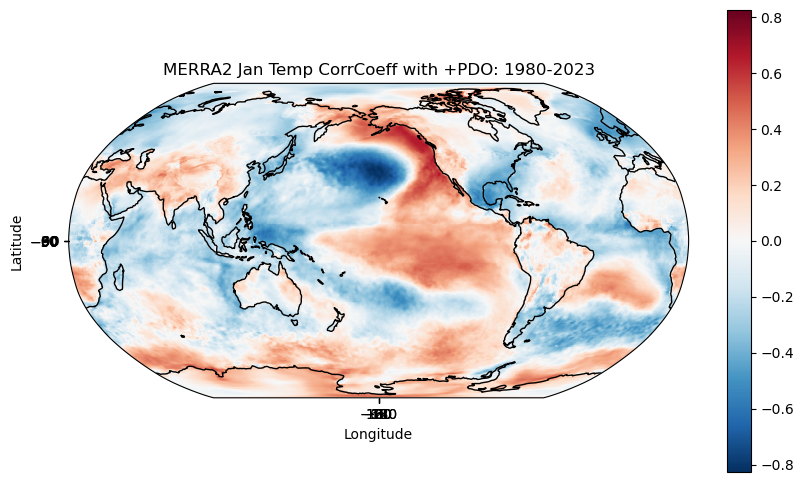

In [197]:
#Temperature Plot
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=clon)) #CL of -160 for Pacific, -80 for Atlantic
corrx.plot(transform=ccrs.PlateCarree())
ax.set_title(f"MERRA2 Jan Temp CorrCoeff with +{o}: 1980-2023")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xticks([-180,-120,-60,0,60,120,180])
ax.set_yticks([-90,-60,-30,0,30,60,90])
ax.coastlines()
plt.savefig(f"figures/JanTempCC{o}.png")
plt.show()

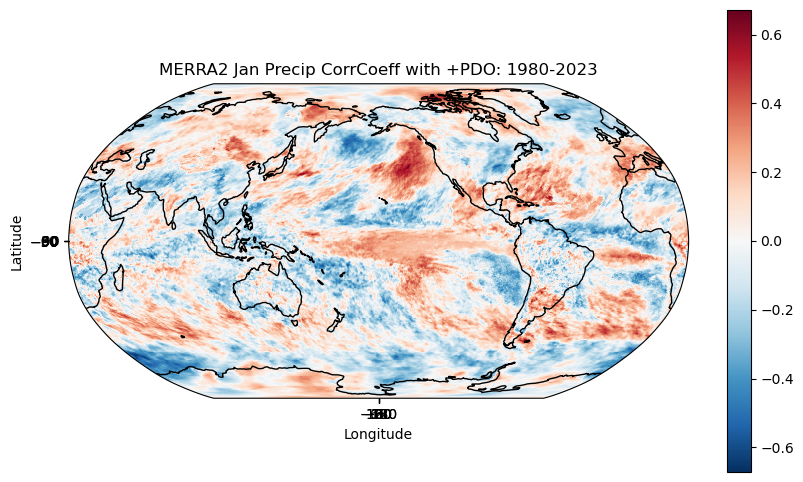

In [198]:
#Precipitation Plot
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=clon)) #CL of -160 for Pacific, -80 for Atlantic
corrx2.plot(transform=ccrs.PlateCarree())
ax.set_title(f"MERRA2 Jan Precip CorrCoeff with +{o}: 1980-2023")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xticks([-180,-120,-60,0,60,120,180])
ax.set_yticks([-90,-60,-30,0,30,60,90])
ax.coastlines()
plt.savefig(f"figures/JanPrecipCC{o}.png")
plt.show()

In [199]:
#Only include significant points
sig_threshold = 0.2974  #Significance threshold for this number of years (44)
corrx = corrx.where(abs(corrx) >= sig_threshold)
corrx2 = corrx2.where(abs(corrx2) >= sig_threshold)

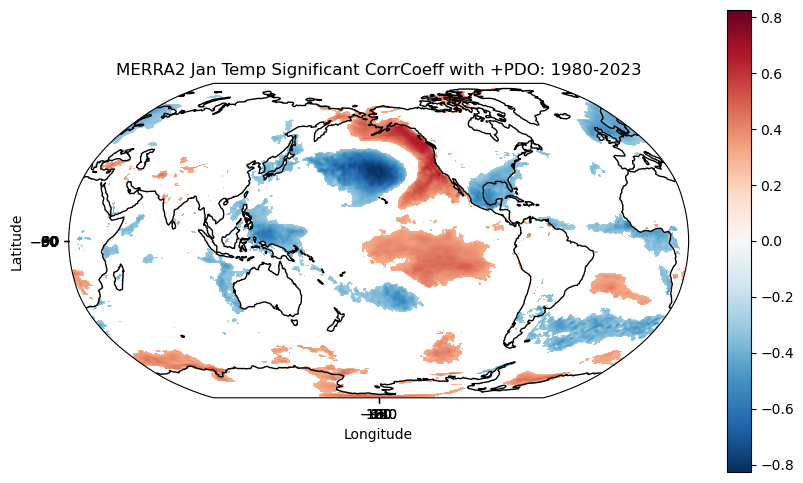

In [200]:
#Significance Temperature Plot
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=clon)) #CL of -160 for Pacific, -80 for Atlantic
corrx.plot(transform=ccrs.PlateCarree())
ax.set_title(f"MERRA2 Jan Temp Significant CorrCoeff with +{o}: 1980-2023")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xticks([-180,-120,-60,0,60,120,180])
ax.set_yticks([-90,-60,-30,0,30,60,90])
ax.coastlines()
plt.savefig(f"figures/JanTempCC{o}sig.png")
plt.show()

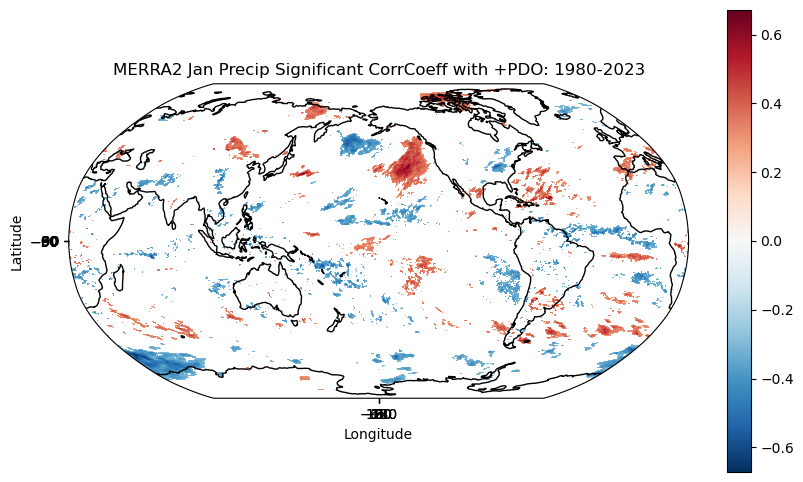

In [201]:
#Significance Precip Plot
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=clon)) #CL of -160 for Pacific, -80 for Atlantic
corrx2.plot(transform=ccrs.PlateCarree())
ax.set_title(f"MERRA2 Jan Precip Significant CorrCoeff with +{o}: 1980-2023")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xticks([-180,-120,-60,0,60,120,180])
ax.set_yticks([-90,-60,-30,0,30,60,90])
ax.coastlines()
plt.savefig(f"figures/JanPrecipCC{o}sig.png")
plt.show()